In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
df = pd.read_csv("train_data.csv",index_col="index")
df.head()

,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.833333,9/1/14,237.00,29.02,31.64,29.57,30.73,29.71,31.52,...,-27.68,-37.21,8.32,9.56,-2.03,48.13,28.09,-13.50,11.90,4.58
1,0.0,0.833333,9/2/14,228.90,29.02,31.64,29.57,30.73,29.71,31.52,...,-21.13,-36.57,8.77,21.17,4.44,48.60,27.41,-23.77,15.44,3.42
2,0.0,0.833333,9/3/14,220.69,29.02,31.64,29.57,30.73,29.71,31.52,...,-10.72,-34.16,6.99,32.16,5.01,48.53,19.21,-33.16,15.11,4.82
3,0.0,0.833333,9/4/14,225.28,29.02,31.64,29.57,30.73,29.71,31.52,...,0.33,-31.04,6.17,39.66,-1.41,50.59,8.29,-37.22,18.24,9.74
4,0.0,0.833333,9/5/14,237.24,29.02,31.64,29.57,30.73,29.71,31.52,...,9.83,-31.80,7.47,38.62,-5.21,54.73,-2.58,-42.30,21.91,10.95


In [4]:
df.shape

(375734, 245)

In [5]:
col = []
for column in df.columns:
    
    if df[column].isna().sum() !=0:
        missing = df[column].isna().sum()
        col.append((column,missing))

In [6]:
col

[('nmme0-tmp2m-34w__ccsm30', 15934),
 ('nmme-tmp2m-56w__ccsm3', 10280),
 ('nmme-prate-34w__ccsm3', 8738),
 ('nmme0-prate-56w__ccsm30', 15934),
 ('nmme0-prate-34w__ccsm30', 15934),
 ('nmme-prate-56w__ccsm3', 10280),
 ('nmme-tmp2m-34w__ccsm3', 8738),
 ('ccsm30', 15934)]

In [7]:
df.select_dtypes("object")

,startdate,climateregions__climateregion
index,,
0,9/1/14,BSh
1,9/2/14,BSh
2,9/3/14,BSh
3,9/4/14,BSh
4,9/5/14,BSh
...,...,...
375729,8/27/16,Dfb
375730,8/28/16,Dfb
375731,8/29/16,Dfb


In [8]:
df["climateregions__climateregion"].value_counts()

BSk    139621
Dfb     52632
Cfa     51901
Csb     40936
Dfa     22661
BWk     13889
Dfc     12427
BWh      9503
Csa      9503
Dsb      8041
BSh      5117
Cfb      4386
Dsc      2924
Dwa      1462
Dwb       731
Name: climateregions__climateregion, dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df["climateregions__climateregion"].nunique() 

15

In [11]:
cols = []

for col in df.columns:
    if df[col].nunique() <= 100:
        cols.append(col)    

cols        

['lat',
 'lon',
 'climateregions__climateregion',
 'elevation__elevation',
 'mjo1d__phase',
 'mei__mei',
 'mei__meirank',
 'mei__nip']

In [38]:
df['elevation__elevation'].unique()

array([ 200.,    0.,   90.,  400.,  300.,  100.,   50., 1000.,  700.,
        500.,  600.,   80.,   60.,  800.,  750., 1200., 1700., 1100.,
        900.,  350.,  430., 2000., 1800., 1900.,  570., 2200., 1500.,
       1300., 2100., 1400., 1050.,  890., 1600., 2500.,  260., 2300.,
       2700., 2600., 2800., 2400., 3100., 1250., 2850.,  780., 1150.,
        850.,  370.,  480.,  560.,  490.,  320.])

In [12]:
df_copy = df.copy()
df_copy.dropna(inplace=True)

In [13]:
for col in cols:
    df[col] = df[col].astype("category")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375734 entries, 0 to 375733
Columns: 245 entries, lat to wind-vwnd-925-2010-20
dtypes: category(8), float64(236), object(1)
memory usage: 685.1+ MB


In [19]:
df2 = df_copy.corr().abs().stack().reset_index().sort_values(0,ascending=False)


In [20]:
df2["pairs"] = list(zip(df2.level_0,df2.level_1))
df2.set_index(["pairs"],inplace=True)
df2.drop(columns = ["level_0","level_1"],inplace=True)

df2.drop_duplicates(inplace = True)

In [21]:
df2.columns = ["cc"]

In [22]:
corr_pairs = df2[(df2.cc > 0.8) & (df2.cc < 1)]

In [23]:
corr_pairs

,cc
pairs,
"(nmme-tmp2m-56w__nmmemean, nmme-tmp2m-34w__nmmemean)",0.998910
"(nmme0-tmp2m-34w__gfdlflora0, nmme0-tmp2m-34w__gfdlflorb0)",0.998893
"(gfdlflorb0, gfdlflora0)",0.998837
"(nmme-tmp2m-56w__cfsv2, nmme-tmp2m-34w__cfsv2)",0.998234
"(nmme-tmp2m-56w__gfdlflorb, nmme-tmp2m-34w__gfdlflorb)",0.998043
...,...
"(nmme0-tmp2m-34w__gfdlflorb0, contest-wind-h500-14d__wind-hgt-500)",0.800955
"(cfsv20, nmme-tmp2m-56w__gfdlflora)",0.800883
"(nmme-prate-56w__nmmemean, nmme-prate-56w__ccsm3)",0.800662


In [113]:
X = df.drop(["contest-tmp2m-14d__tmp2m","startdate","climateregions__climateregion"],axis =1)

In [119]:
correlation_matrix = df.corr()

In [120]:
correlated_features = set()


for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [121]:
len(correlated_features)

88

In [125]:
correlated_features

{'cancm30',
 'cancm40',
 'ccsm30',
 'ccsm40',
 'cfsv20',
 'contest-prwtr-eatm-14d__prwtr',
 'contest-tmp2m-14d__tmp2m',
 'contest-wind-h100-14d__wind-hgt-100',
 'contest-wind-h500-14d__wind-hgt-500',
 'elevation__elevation',
 'gfdl0',
 'gfdlflora0',
 'gfdlflorb0',
 'icec-2010-1',
 'icec-2010-5',
 'nasa0',
 'nmme-prate-34w__cancm4',
 'nmme-prate-34w__gfdl',
 'nmme-prate-34w__gfdlflorb',
 'nmme-prate-34w__nmmemean',
 'nmme-prate-56w__cancm3',
 'nmme-prate-56w__cancm4',
 'nmme-prate-56w__ccsm3',
 'nmme-prate-56w__ccsm4',
 'nmme-prate-56w__cfsv2',
 'nmme-prate-56w__gfdl',
 'nmme-prate-56w__gfdlflora',
 'nmme-prate-56w__gfdlflorb',
 'nmme-prate-56w__nasa',
 'nmme-prate-56w__nmmemean',
 'nmme-tmp2m-34w__cancm3',
 'nmme-tmp2m-34w__cancm4',
 'nmme-tmp2m-34w__ccsm3',
 'nmme-tmp2m-34w__ccsm4',
 'nmme-tmp2m-34w__cfsv2',
 'nmme-tmp2m-34w__gfdl',
 'nmme-tmp2m-34w__gfdlflora',
 'nmme-tmp2m-34w__gfdlflorb',
 'nmme-tmp2m-34w__nasa',
 'nmme-tmp2m-34w__nmmemean',
 'nmme-tmp2m-56w__cancm3',
 'nmme-tmp2m-

In [129]:
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(np.bool))

In [130]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]

In [133]:
corr_pairs.index[0][0]

'gfdlflora0'

In [24]:
df_copy.corr()["contest-tmp2m-14d__tmp2m"].abs().sort_values(ascending=False)

contest-tmp2m-14d__tmp2m    1.000000
nmme-tmp2m-34w__cfsv2       0.954596
nmme-tmp2m-56w__cfsv2       0.954327
nmme-tmp2m-56w__nmmemean    0.950517
nmme-tmp2m-34w__nmmemean    0.950442
                              ...   
wind-hgt-100-2010-5         0.010607
nmme-prate-34w__nasa        0.009077
mei__mei                    0.006207
wind-vwnd-250-2010-15       0.003422
nmme-prate-56w__nasa        0.002506
Name: contest-tmp2m-14d__tmp2m, Length: 243, dtype: float64

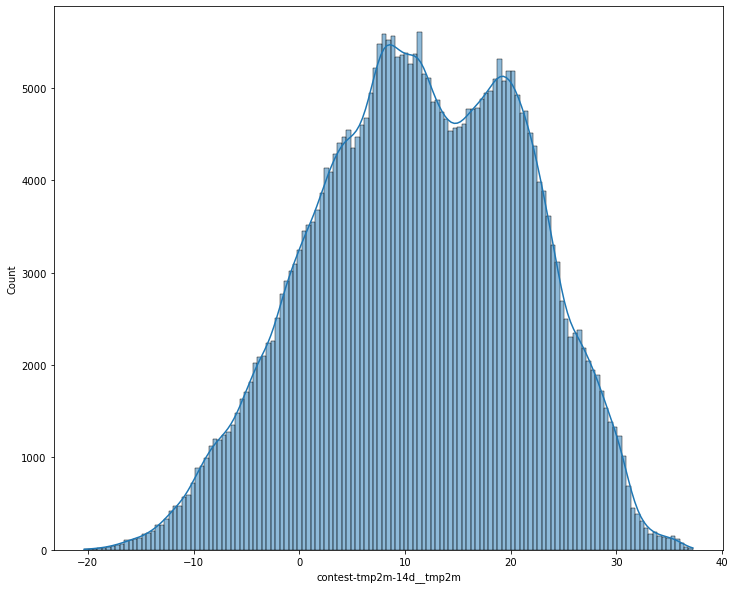

In [30]:
fig,ax = plt.subplots(figsize = (12,10))

sns.histplot(x = df_copy["contest-tmp2m-14d__tmp2m"],ax=ax,kde=True);

In [40]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [33]:
y = df_copy["contest-tmp2m-14d__tmp2m"]
X = df_copy.drop(["contest-tmp2m-14d__tmp2m","startdate"],axis = 1)

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 71)

In [34]:
one_hot_train = pd.get_dummies(X_train,drop_first=True)
one_hot_test = pd.get_dummies(X_test,drop_first=True)
one_hot_train.shape

(264453, 256)

In [35]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(one_hot_train)
X_test_scaled = scaler.transform(one_hot_test)

In [38]:
baseline = DecisionTreeRegressor(random_state=71)

baseline.fit(X_train_scaled,y_train)

preds = baseline.predict(X_test_scaled)

In [39]:
mean_squared_error(y_test,preds,squared=False)

0.7594603483617993

In [41]:
cross = cross_val_score(baseline,X_train_scaled,y_train,scoring='neg_root_mean_squared_error')

In [43]:
-cross.mean()

0.8366194017912798